In [74]:
%matplotlib inline

In [75]:
import xlrd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

In [76]:
adc0 = np.linspace(0,63,64)
adc1 = adc0 + 64
adc2 = adc1 + 64
adc3 = adc2 + 64

In [77]:
shunt_1=['1.62', '4.86', '8.11', '11.35', '14.59', '17.84', '21.08', '24.32', '27.57', '30.81', '34.05', '37.30', '40.54', '43.78', '47.03', '50.27', '56.75', '63.24', '69.73', '76.21', '82.70', '89.19', '95.67', '102.2', '108.6', '115.1', '121.6', '128.1', '134.6', '141.1', '147.6', '154.0', '160.5', '167.0', '173.5', '180.0', '193.0', '205.9', '218.9', '231.9', '244.9', '257.8', '270.8', '283.8', '296.7', '309.7', '322.7', '335.7', '348.6', '361.6', '374.6', '387.6', '400.5', '413.5', '426.5', '439.4', '452.4', '478.4', '504.3', '530.3', '556.2', '582.1', '608.1', '634.0', '577.6', '603.0', '628.5', '654.0', '679.5', '705.0', '730.5', '756.0', '781.5', '806.9', '832.4', '857.9', '883.4', '908.9', '934.4', '959.9', '1010.9', '1061.8', '1112.8', '1163.8', '1214.8', '1265.7', '1316.7', '1367.7', '1418.7', '1469.6', '1520.6', '1571.6', '1622.6', '1673.5', '1724.5', '1775.5', '1826.5', '1877.5', '1928.4', '1979.4', '2081.4', '2183.3', '2285.3', '2387.2', '2489.2', '2591.1', '2693.1', '2795.0', '2897.0', '2998.9', '3100.9', '3202.8', '3304.8', '3406.8', '3508.7', '3610.7', '3712.6', '3814.6', '3916.5', '4018.5', '4120.4', '4324.3', '4528.2', '4732.1', '4936.1', '5140.0', '5343.9', '5547.8', '5331.9', '5542.5', '5753.1', '5963.7', '6174.3', '6384.9', '6595.5', '6806.1', '7016.7', '7227.3', '7437.9', '7648.4', '7859.0', '8069.6', '8280.2', '8490.8', '8912.0', '9333.2', '9754.3', '10175.5', '10596.7', '11017.9', '11439.1', '11860.3', '12281.4', '12702.6', '13123.8', '13545.0', '13966.2', '14387.3', '14808.5', '15229.7', '15650.9', '16072.1', '16493.2', '16914.4', '17756.8', '18599.1', '19441.5', '20283.9', '21126.2', '21968.6', '22811.0', '23653.3', '24495.7', '25338.0', '26180.4', '27022.8', '27865.1', '28707.5', '29549.9', '30392.2', '31234.6', '32076.9', '32919.3', '33761.7', '34604.0', '36288.8', '37973.5', '39658.2', '41342.9', '43027.6', '44712.4', '46397.1', '43321.6', '44990.1', '46658.6', '48327.1', '49995.7', '51664.2', '53332.7', '55001.2', '56669.7', '58338.2', '60006.7', '61675.2', '63343.7', '65012.3', '66680.8', '68349.3', '71686.3', '75023.3', '78360.3', '81697.4', '85034.4', '88371.4', '91708.4', '95045.4', '98382.5', '101719.5', '105056.5', '108393.5', '111730.6', '115067.6', '118404.6', '121741.6', '125078.6', '128415.7', '131752.7', '135089.7', '141763.8', '148437.8', '155111.8', '161785.9', '168459.9', '175134.0', '181808.0', '188482.1', '195156.1', '201830.1', '208504.2', '215178.2', '221852.3', '228526.3', '235200.4', '241874.4', '248548.4', '255222.5', '261896.5', '268570.6', '275244.6', '288592.7', '301940.8', '315288.9', '328637.0', '341985.1', '355333.1', '368681.2']
shunt_1p5=['2.44', '7.32', '12.20', '17.08', '21.96', '26.84', '31.72', '36.60', '41.48', '46.36', '51.24', '56.12', '61.00', '65.88', '70.76', '75.65', '85.41', '95.17', '104.9', '114.7', '124.4', '134.2', '144.0', '153.7', '163.5', '173.3', '183.0', '192.8', '202.5', '212.3', '222.1', '231.8', '241.6', '251.3', '261.1', '270.9', '290.4', '309.9', '329.4', '348.9', '368.5', '388.0', '407.5', '427.0', '446.6', '466.1', '485.6', '505.1', '524.6', '544.2', '563.7', '583.2', '602.7', '622.2', '641.8', '661.3', '680.8', '719.9', '758.9', '797.9', '837.0', '876.0', '915.1', '954.1', '869.1', '907.5', '945.8', '984.2', '1022.5', '1060.9', '1099.2', '1137.6', '1176.0', '1214.3', '1252.7', '1291.0', '1329.4', '1367.7', '1406.1', '1444.4', '1521.2', '1597.9', '1674.6', '1751.3', '1828.0', '1904.7', '1981.4', '2058.1', '2134.8', '2211.5', '2288.3', '2365.0', '2441.7', '2518.4', '2595.1', '2671.8', '2748.5', '2825.2', '2901.9', '2978.7', '3132.1', '3285.5', '3438.9', '3592.3', '3745.8', '3899.2', '4052.6', '4206.0', '4359.4', '4512.9', '4666.3', '4819.7', '4973.1', '5126.5', '5280.0', '5433.4', '5586.8', '5740.2', '5893.7', '6047.1', '6200.5', '6507.3', '6814.2', '7121.0', '7427.9', '7734.7', '8041.5', '8348.4', '8023.6', '8340.5', '8657.4', '8974.3', '9291.2', '9608.1', '9925.0', '10241.9', '10558.8', '10875.7', '11192.6', '11509.5', '11826.4', '12143.3', '12460.2', '12777.1', '13410.9', '14044.7', '14678.5', '15312.3', '15946.1', '16579.9', '17213.7', '17847.5', '18481.3', '19115.1', '19748.9', '20382.7', '21016.5', '21650.3', '22284.1', '22918.0', '23551.8', '24185.6', '24819.4', '25453.2', '26720.8', '27988.4', '29256.0', '30523.6', '31791.2', '33058.8', '34326.4', '35594.0', '36861.6', '38129.2', '39396.8', '40664.4', '41932.0', '43199.6', '44467.2', '45734.8', '47002.4', '48270.0', '49537.6', '50805.2', '52072.8', '54608.0', '57143.2', '59678.4', '62213.6', '64748.8', '67284.0', '69819.3', '65191.2', '67702.0', '70212.8', '72723.6', '75234.4', '77745.2', '80256.1', '82766.9', '85277.7', '87788.5', '90299.3', '92810.1', '95320.9', '97831.7', '100342.5', '102853.3', '107874.9', '112896.5', '117918.2', '122939.8', '127961.4', '132983.0', '138004.6', '143026.2', '148047.9', '153069.5', '158091.1', '163112.7', '168134.3', '173155.9', '178177.5', '183199.2', '188220.8', '193242.4', '198264.0', '203285.6', '213328.9', '223372.1', '233415.3', '243458.5', '253501.8', '263545.0', '273588.2', '283631.5', '293674.7', '303717.9', '313761.2', '323804.4', '333847.6', '343890.8', '353934.1', '363977.3', '374020.5', '384063.8', '394107.0', '404150.2', '414193.5', '434279.9', '454366.4', '474452.8', '494539.3', '514625.8', '534712.2', '554798.7']


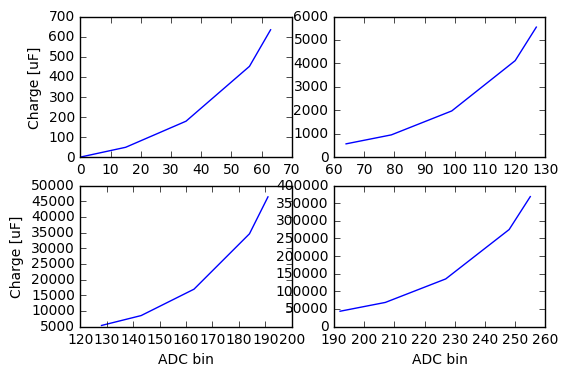

In [78]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(2, 2, 1)
ax1.plot(adc0,shunt_1[0:64])
ax1.set_ylabel('Charge [uF]')
ax2 = fig1.add_subplot(2, 2, 2)
ax2.plot(adc1,shunt_1[64:128])
ax3 = fig1.add_subplot(2, 2, 3)
ax3.plot(adc2,shunt_1[128:192])
ax3.set_ylabel('Charge [uF]')
ax3.set_xlabel('ADC bin')
ax4 = fig1.add_subplot(2, 2, 4)
ax4.plot(adc3,shunt_1[192:256])
ax4.set_xlabel('ADC bin')

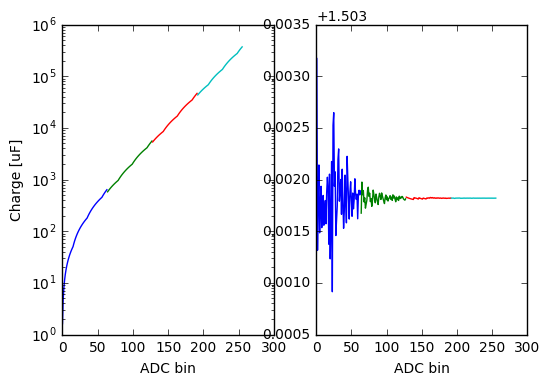

In [86]:
fig2 = plt.figure()
bx1 = fig2.add_subplot(1, 2, 1)
bx1.semilogy(adc0,shunt_1[0:64])
bx1.plot(adc1,shunt_1[64:128])
bx1.plot(adc2,shunt_1[128:192])
bx1.plot(adc3,shunt_1[192:256])
bx1.set_ylabel('Charge [uF]')
bx1.set_xlabel('ADC bin')

shuntarr1 = (np.array(shunt_1)).astype(np.float)
shuntarr1p5=(np.array(shunt_1p5)).astype(np.float)

ratio1p5 = shuntarr1p5/shuntarr1
bx2 = fig2.add_subplot(1,2,2)
bx2.plot(adc0, ratio1p5[0:64])
bx2.plot(adc1, ratio1p5[64:128])
bx2.plot(adc2, ratio1p5[128:192])
bx2.plot(adc3, ratio1p5[192:256])
bx2.set_xlabel('ADC bin')